In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target_label'] = data['target'].apply(lambda x: iris.target_names[x])

In [7]:
print("Dataset Shape:", data.shape)

Dataset Shape: (150, 6)


In [8]:
print("\nColumns in Dataset:")
for column in data.columns:
    print(f" - {column}")


Columns in Dataset:
 - sepal length (cm)
 - sepal width (cm)
 - petal length (cm)
 - petal width (cm)
 - target
 - target_label


In [9]:
print("\nFirst 5 Rows of Dataset:")
display(data.head())


First 5 Rows of Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [37]:
print("\nTarget Names:", iris.target_names)
print("\nFeature Names:")
for feature in iris.feature_names:
    print(f" - {feature}")


Target Names: ['setosa' 'versicolor' 'virginica']

Feature Names:
 - sepal length (cm)
 - sepal width (cm)
 - petal length (cm)
 - petal width (cm)


In [38]:
print("\nStatistical Summary of Dataset:")
display(data.describe())


Statistical Summary of Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


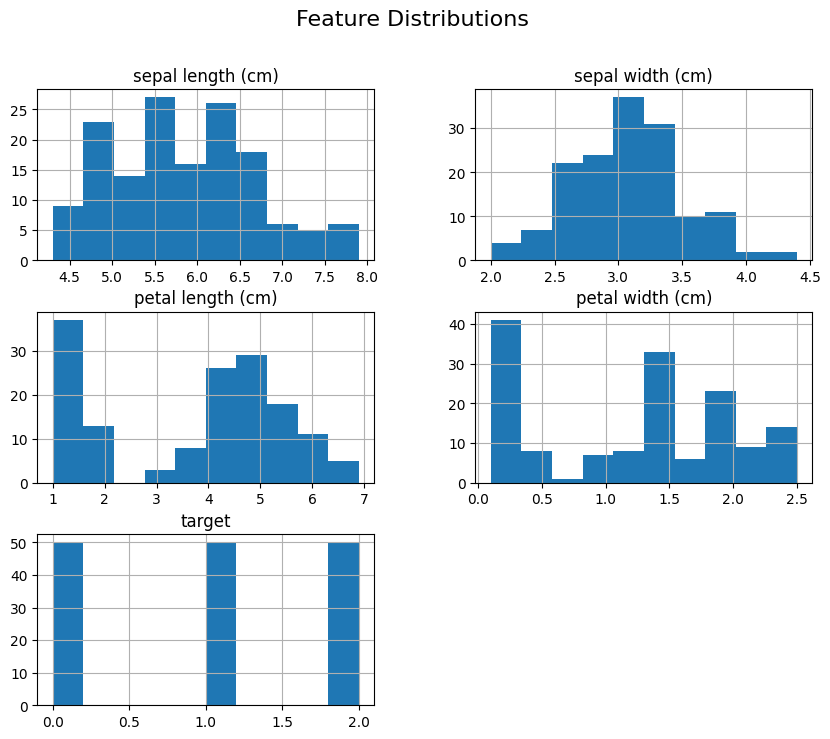

In [10]:
data.iloc[:, :-1].hist(figsize=(10, 8))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

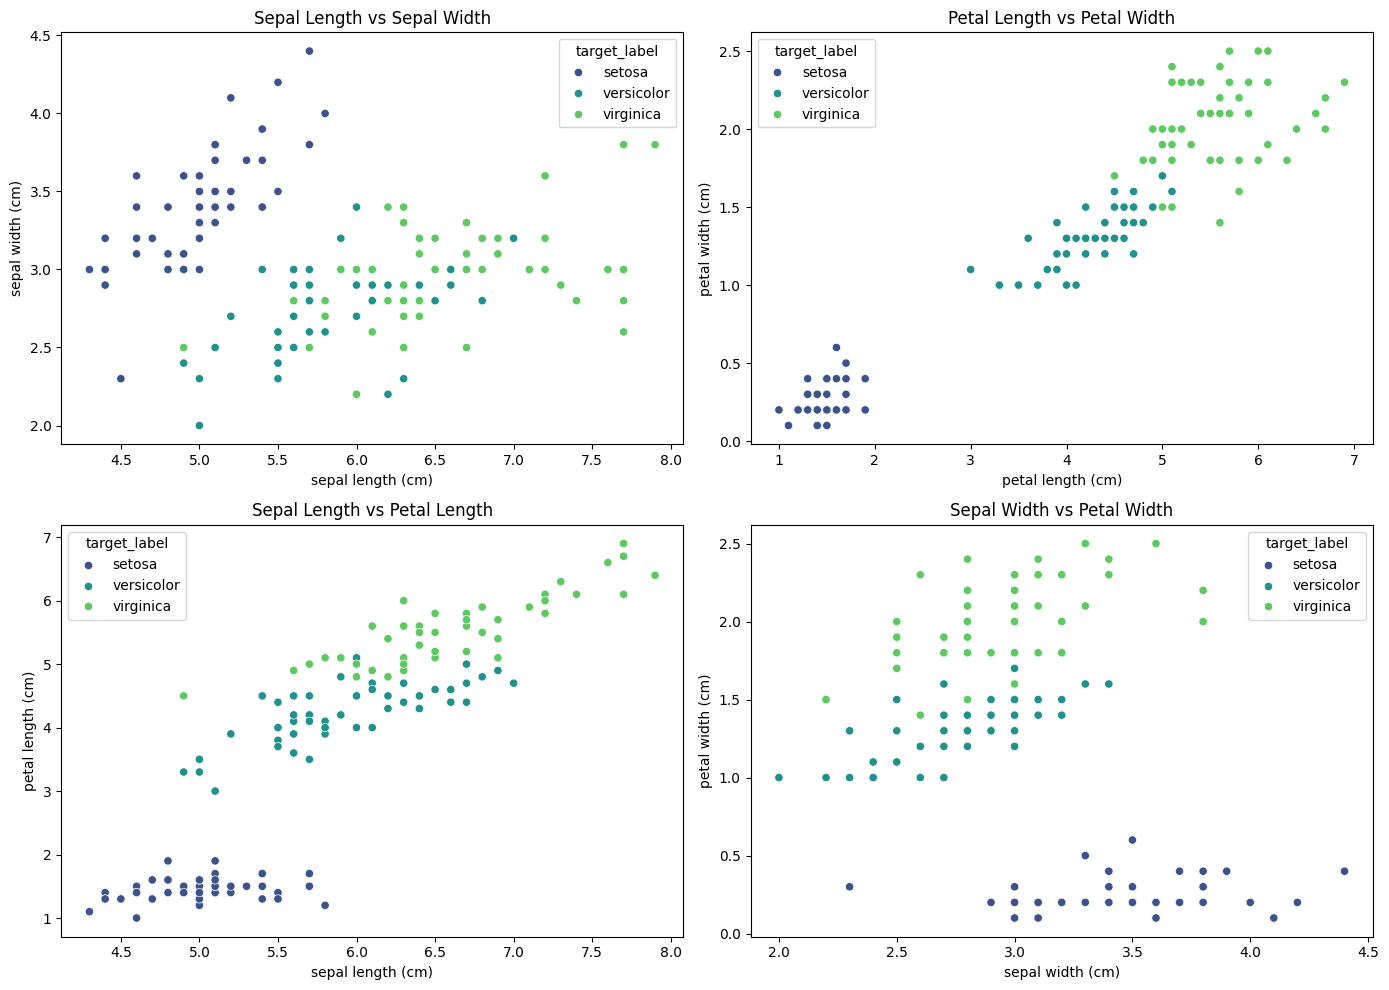

In [11]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target_label', data=data, palette='viridis')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target_label', data=data, palette='viridis')
plt.title('Petal Length vs Petal Width')

plt.subplot(2, 2, 3)
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target_label', data=data, palette='viridis')
plt.title('Sepal Length vs Petal Length')

plt.subplot(2, 2, 4)
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', hue='target_label', data=data, palette='viridis')
plt.title('Sepal Width vs Petal Width')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
print("\nMissing Values in Dataset:")
display(data.isnull().sum())


Missing Values in Dataset:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_label         0
dtype: int64

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:, :-2])  # Exclude 'target' and 'target_label'
scaled_data = pd.DataFrame(scaled_features, columns=iris.feature_names)
scaled_data['target'] = data['target']

In [15]:
print("\nFeature Scaling - Statistics After Standardization:")
print("Mean of Scaled Features:")
display(scaled_data.iloc[:, :-1].mean())
print("\nStandard Deviation of Scaled Features:")
display(scaled_data.iloc[:, :-1].std())


Feature Scaling - Statistics After Standardization:
Mean of Scaled Features:


sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64


Standard Deviation of Scaled Features:


sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64

In [16]:
print("\nFirst 5 Rows of Scaled Dataset:")
display(scaled_data.head())


First 5 Rows of Scaled Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [28]:
X = scaled_data.iloc[:, :-1] 
y = scaled_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [25]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200)
}

In [26]:
evaluation_results = {}

print("\nModel Evaluation Results:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)
    cross_val_acc = cross_val_score(model, X, y, cv=5).mean()
    
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Cross-Validation Accuracy": cross_val_acc,
        "Classification Report": classification_rep
    }
print(f"--- {name} ---")
print(f"Accuracy: {accuracy:.2f}")
print(f"Cross-Validation Accuracy: {cross_val_acc:.2f}")
print("Classification Report:")
print(classification_rep)
print("\n")


Model Evaluation Results:

--- Logistic Regression ---
Accuracy: 0.99
Cross-Validation Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.96      1.00      0.98        23
   virginica       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75





In [27]:
print("\nComparison of Model Performance:\n")
for name, results in evaluation_results.items():
    print(f"Model: {name}")
    print(f" - Test Accuracy: {results['Accuracy']:.2f}")
    print(f" - Cross-Validation Accuracy: {results['Cross-Validation Accuracy']:.2f}")
    print("\nClassification Report:")
    print(results['Classification Report'])
    print("\n")


Comparison of Model Performance:

Model: KNN
 - Test Accuracy: 0.96
 - Cross-Validation Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.88      1.00      0.94        23
   virginica       1.00      0.87      0.93        23

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



Model: Decision Tree
 - Test Accuracy: 0.91
 - Cross-Validation Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.83      0.87      0.85        23
   virginica       0.86      0.83      0.84        23

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75



Mod